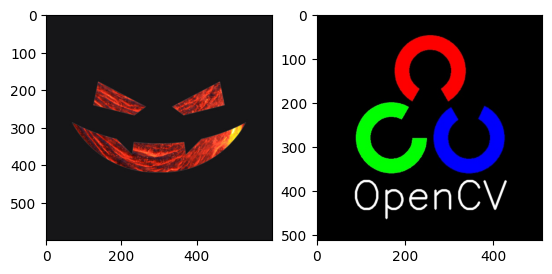

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
import cv2
import timeit
import numpy as np

img = cv2.imread('./irokez-logo.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./cv-logo.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img2)

Оптимизация включена: True
Irokez: 0.4189192
Opencv: 0.2237073


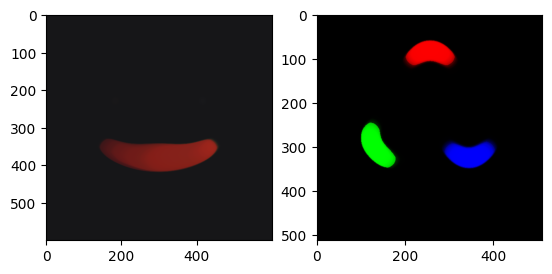

In [48]:
# Считаем количество циклов
print("Оптимизация включена:", cv2.useOptimized())

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img = cv2.medianBlur(img,i)
    
e2 = cv2.getTickCount()

# Вычисляем время в мс
t = (e2 - e1)/cv2.getTickFrequency()

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img2 = cv2.medianBlur(img2,i)
    
e2 = cv2.getTickCount()

t2 = (e2 - e1)/cv2.getTickFrequency()


print("Irokez:", t)
print("Opencv:", t2)


fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img2)

In [49]:
# Тест с оптимизациями
start = cv2.getTickCount()
for _ in range(10):
    res = cv2.medianBlur(img, 49)
end = cv2.getTickCount()
print("С оптимизацеией Irokez:", (end - start) /cv2.getTickFrequency(), "ms per loop")

# Тест с оптимизациями
start = cv2.getTickCount()
for _ in range(10):
    res = cv2.medianBlur(img2, 49)
end = cv2.getTickCount()
print("С оптимизацеией OpenCV:", (end - start) /cv2.getTickFrequency(), "ms per loop")

С оптимизацеией Irokez: 0.1876794 ms per loop
С оптимизацеией OpenCV: 0.0911702 ms per loop


In [50]:
# Выключаем оптимизации
cv2.setUseOptimized(False)
print("Оптимизация включена:", cv.useOptimized())

# Тест без оптимизаций
start = cv2.getTickCount()
for _ in range(10):
    res = cv2.medianBlur(img, 49)
end = cv2.getTickCount()
print("Без оптимизации Irokez:", (end - start) /cv.getTickFrequency(), "ms per loop")

start1 = cv2.getTickCount()
for _ in range(10):
    res2 = cv2.medianBlur(img2, 49)
end1 = cv2.getTickCount()
print("Без оптимизации OpenCV:", (end1 - start1) /cv.getTickFrequency(), "ms per loop")


Оптимизация включена: False
Без оптимизации Irokez: 0.1890572 ms per loop
Без оптимизации OpenCV: 0.100698 ms per loop


In [51]:
cv.setUseOptimized(True)

# --- 1. Сравнение операций возведения в квадрат ---
x = 5
print("Скалярные операции Python:")
print("x ^ 2:", timeit.timeit('y = x ** 2', number=10_000_000, globals=globals()))
print("x * x:", timeit.timeit('y = x * x', number=10_000_000, globals=globals()))

z = np.uint8([5])
print("\nОперации NumPy:")
print("z * z:", timeit.timeit('y = z * z', number=1_000_000, globals=globals()))
print("np.square(z):", timeit.timeit('y = np.square(z)', number=1_000_000, globals=globals()))

# --- 2. Сравнение функций OpenCV и NumPy ---
img1 = np.random.randint(0, 2, (1000, 1000), dtype=np.uint8)

print("\nПодсчёт ненулевых элементов:")
print("cv.countNonZero:", timeit.timeit('cv.countNonZero(img1)', number=100_000, globals=globals()))
print("np.count_nonzero:", timeit.timeit('np.count_nonzero(img1)', number=1_000, globals=globals()))

Скалярные операции Python:
x ^ 2: 0.2509390003979206
x * x: 0.19837719947099686

Операции NumPy:
z * z: 0.42308739945292473
np.square(z): 0.5014458997175097

Подсчёт ненулевых элементов:
cv.countNonZero: 3.125402799807489
np.count_nonzero: 0.03716609999537468
